In [63]:
pip install pyopenms

Note: you may need to restart the kernel to use updated packages.


# Reading Raw MS data
## mzML files in memory
As discussed in the last section, the most straight forward way to load mass spectrometric data is using the MzMLFile class:

In [64]:
from pyopenms import *
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
# from urllib import urlretrieve  # use this code for Python 2.x
urlretrieve ("http://proteowizard.sourceforge.net/example_data/small.pwiz.1.1.mzML", "test.mzML")
exp = MSExperiment()
MzMLFile().load("test.mzML", exp)

which will load the content of the “test.mzML” file into the exp variable of type MSExperiment. We can access the raw data and spectra through:

In [69]:
spectrum_data = exp.getSpectrum(0).get_peaks()
print(spectrum_data)
print()
chromatogram_data = exp.getChromatogram(0).get_peaks()
print(chromatogram_data)

(array([ 200.00018817,  200.00043034,  200.00067252, ..., 1999.96151259,
       1999.98572931, 2000.00994662]), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32))

(array([ 0.2961,  0.4738,  0.6731,  1.3703,  2.0955,  2.9172,  3.7154,
        4.5009,  4.6673,  4.8722,  5.5742,  6.2882,  7.0329,  7.8013,
        8.6071,  8.7845,  8.9853,  9.6865, 10.4022, 11.1995, 12.0417,
       12.8204, 13.0048, 13.2044, 13.9754, 14.6847, 15.5503, 16.3598,
       17.129 , 17.3339, 18.2222, 18.939 , 19.7116, 20.5749, 21.5135,
       21.6857, 21.8853, 22.5947, 23.3204, 24.1177, 24.9079, 25.709 ,
       25.9933, 26.194 , 26.8992, 27.6339, 28.3862, 29.2342]), array([15245068.   , 12901166.   ,   586279.   ,   441570.16 ,
         114331.7  ,   130427.305,   580561.06 , 15148302.   ,
       10349958.   ,   848427.3  ,   456143.44 ,   124170.38 ,
         104264.8  ,   147409.23 , 18257344.   , 11037852.   ,
        1102582.1  ,   360250.97 ,   125874.83 ,   142243.39 ,
         147414.58 , 17613074.   , 

MS Level = 1
RT = 0.29610000000000003



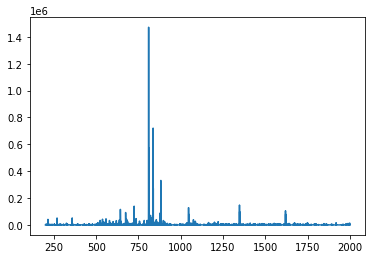

In [81]:
print("MS Level = {}".format(exp.getSpectrum(0).getMSLevel()))
print("RT = {}".format(exp.getSpectrum(0).getRT()))
print()
plt.plot(spectrum_data[0],spectrum_data[1])

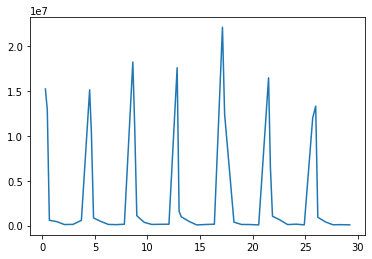

In [67]:
plt.plot(chromatogram_data[0],chromatogram_data[1])

In [76]:
exp_in = MSExperiment()
exp_out = MSExperiment()

MzMLFile().load("test.mzML", exp_in)

chromatogram = MSChromatogram()

spectra_list = list()
chr_rt = list()
chr_i = list()

for s in exp.getSpectra():
    ms_level = s.getMSLevel()
    if ms_level == 1:
        spectra_list.append(s)
        
        rt = s.getRT()
        i = np.max(s.get_peaks()[1])
        
        chr_rt.append(rt)
        chr_i.append(i)
        
chromatogram.set_peaks([chr_rt, chr_i])

exp_out.setSpectra(spectra_list)
exp_out.addChromatogram(chromatogram)

MzMLFile().store("filtered_1.mzML", exp_out)

Which will only keep MS1 spectra in the MSExperiment. We can then store the modified data structure on disk:

In [77]:
exp_filtered = MSExperiment()
MzMLFile().load("filtered_1.mzML", exp_filtered)
spectrum_data = exp_filtered.getSpectrum(0).get_peaks()
chromatogram_data = exp_filtered.getChromatogram(0).get_peaks()
spectrum_data = exp_filtered.getSpectrum(0).get_peaks()
print(spectrum_data)
print()
chromatogram_data = exp_filtered.getChromatogram(0).get_peaks()
print(chromatogram_data)

(array([ 200.00018817,  200.00043034,  200.00067252, ..., 1999.96151259,
       1999.98572931, 2000.00994662]), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32))

(array([ 0.2961,  0.4738,  4.5009,  4.6673,  8.6071,  8.7845, 12.8204,
       13.0048, 17.129 , 17.3339, 21.5135, 21.6857, 25.709 , 25.9933]), array([1471224.9  ,  183838.72 , 1651648.4  ,  143063.16 , 2027061.1  ,
        134546.1  , 2037945.   ,   20583.182, 2637890.8  ,  189316.16 ,
       1738482.6  ,  105772.07 , 1346706.   ,  174472.94 ], dtype=float32))


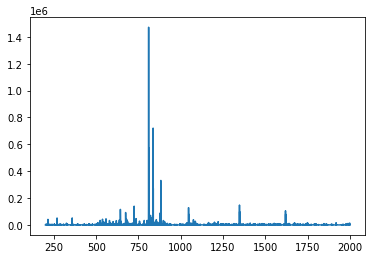

In [71]:
plt.plot(spectrum_data[0],spectrum_data[1])

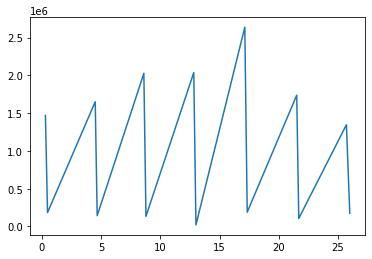

In [72]:
plt.plot(chromatogram_data[0],chromatogram_data[1])